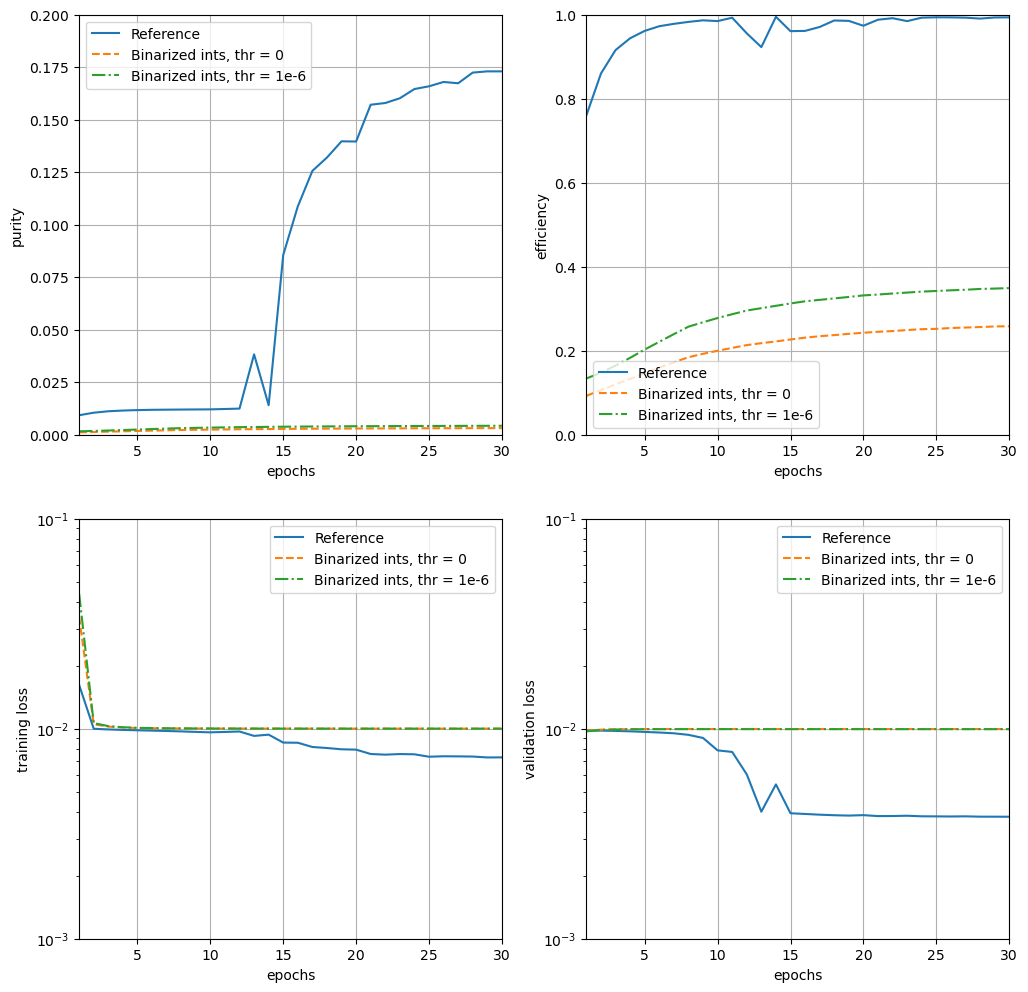

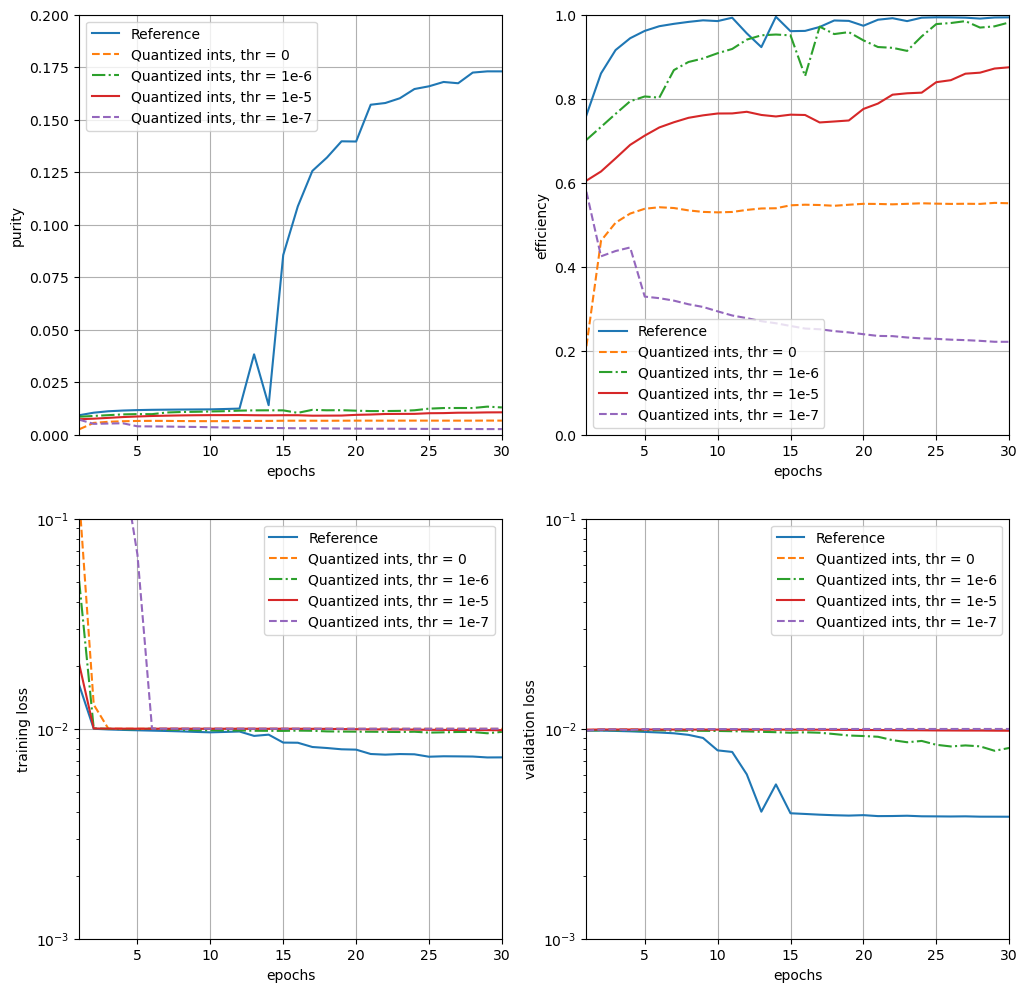

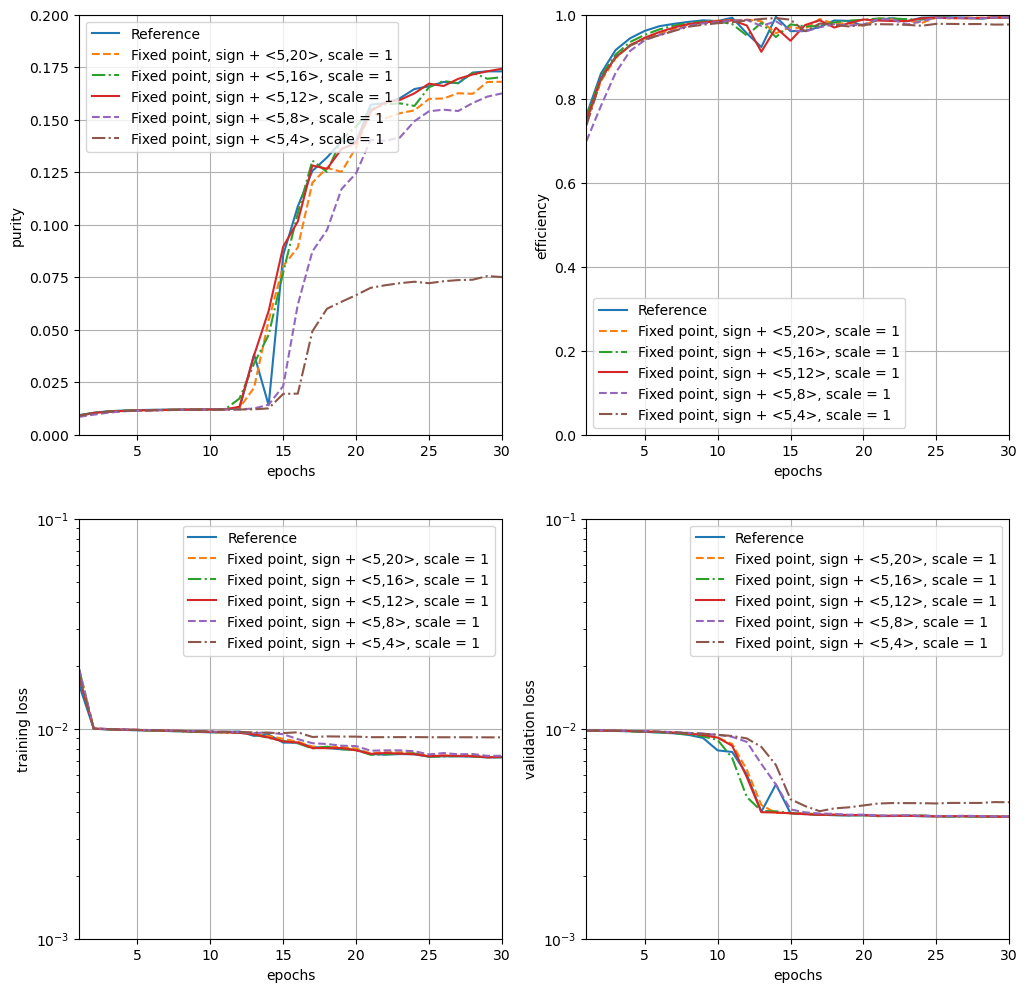

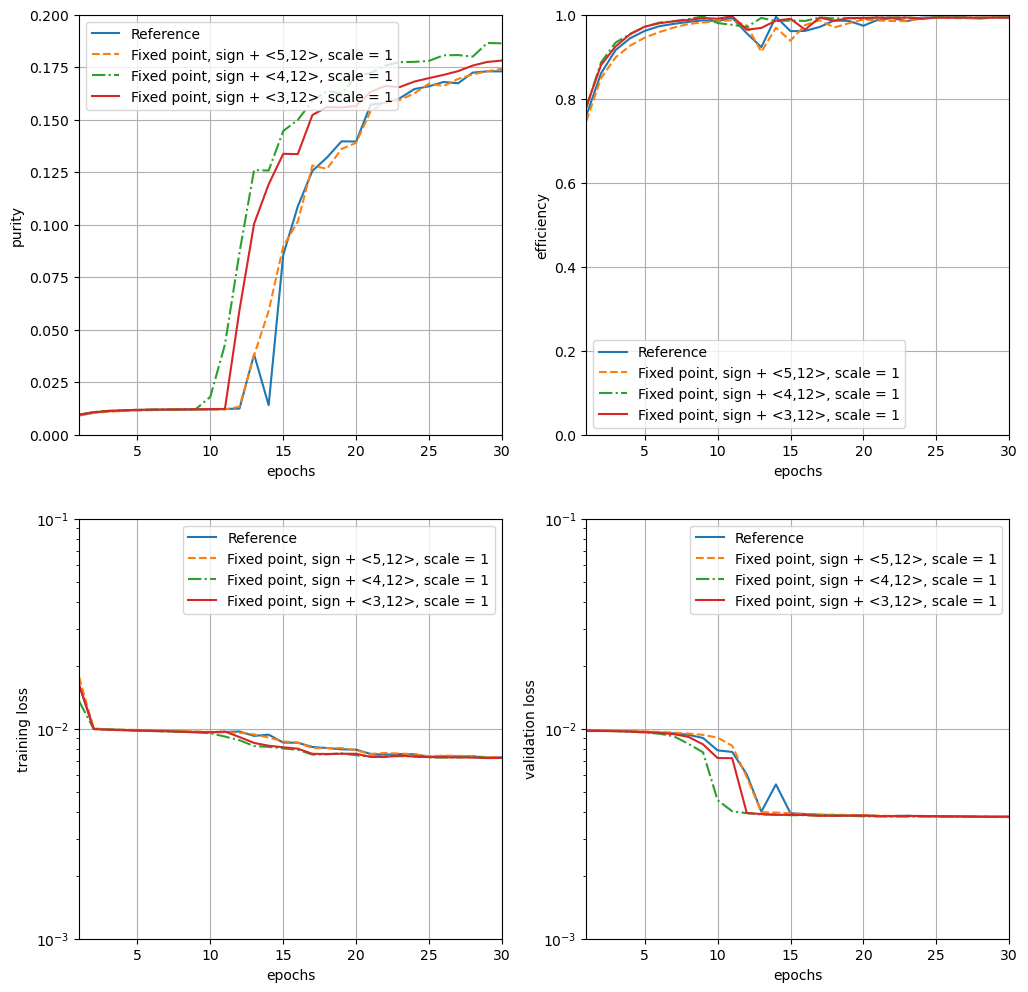

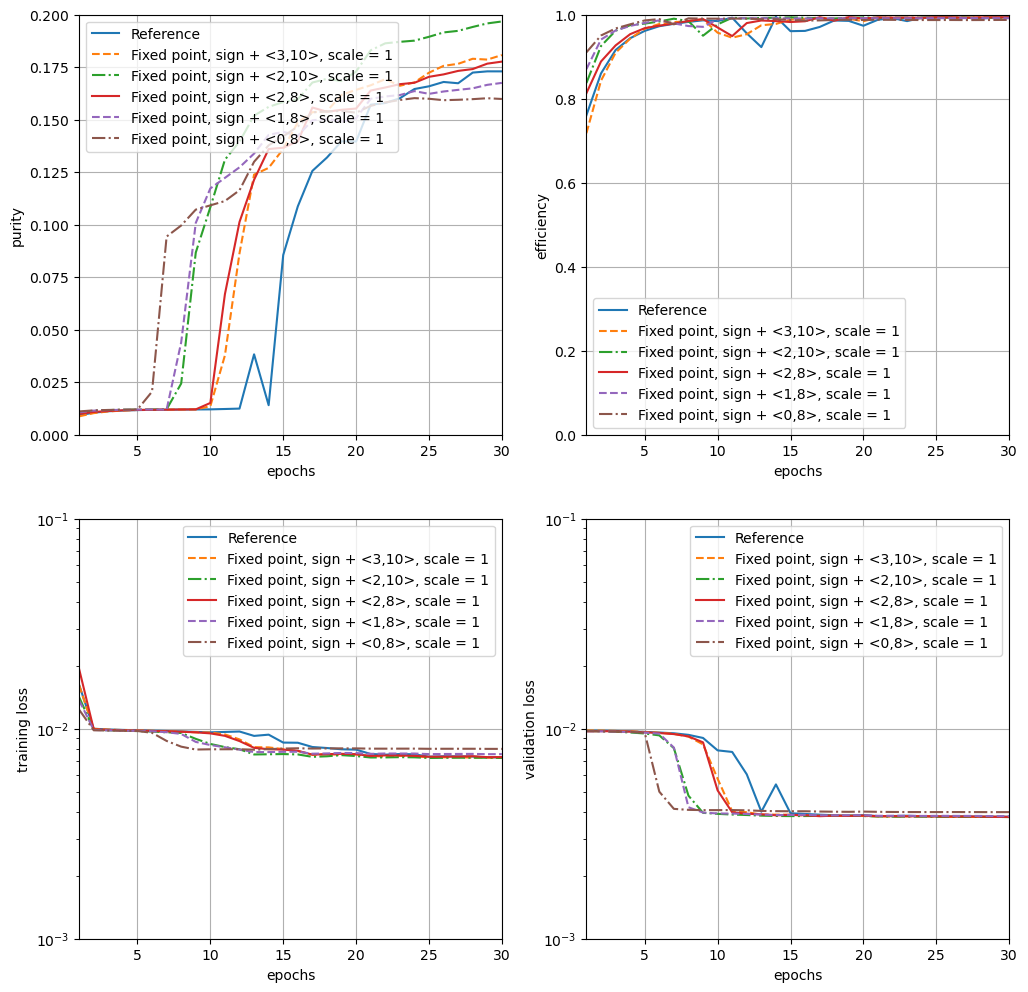

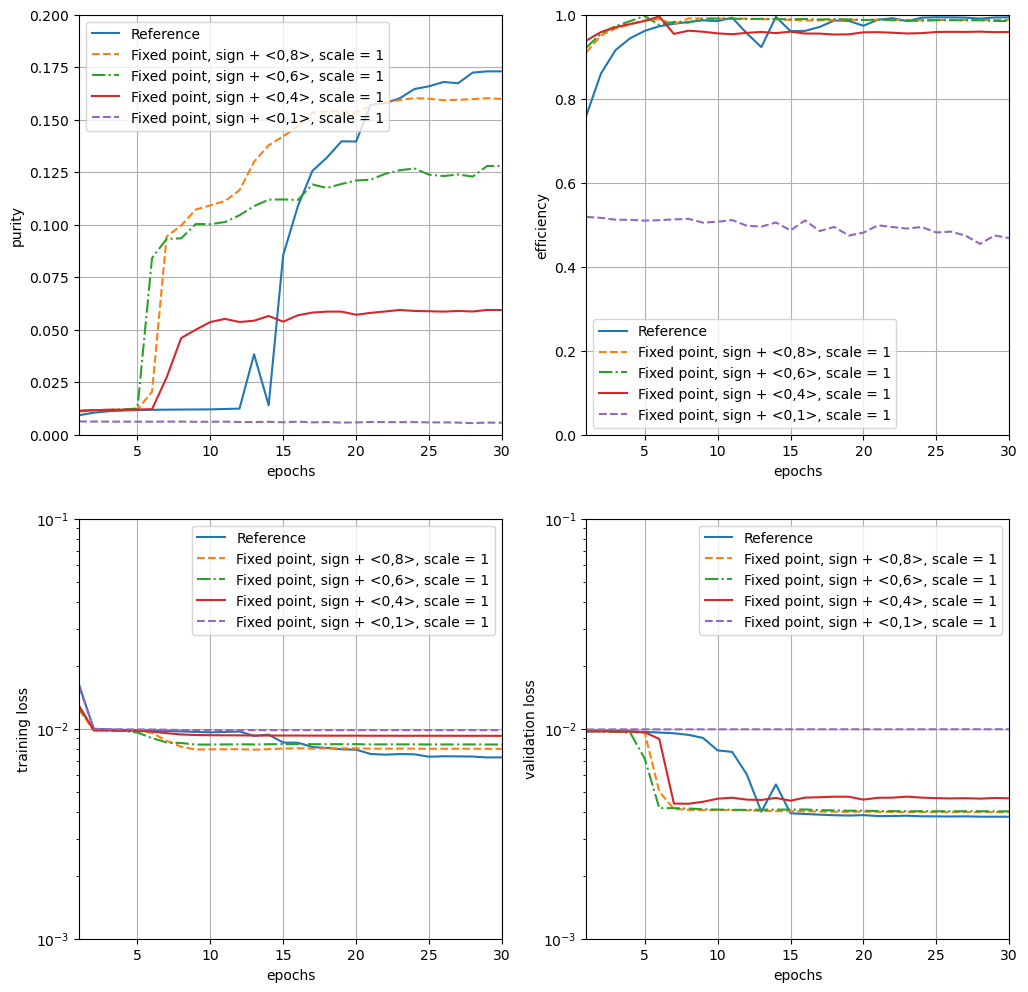

In [96]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
def filter_nan(arr): 

     """The way csv file is created for qnn networks, contain some 'nans'
    Therefore I created a function to remove 'nan' from the csv file array"""
     index =np.where( np.isnan(arr)==0)
     filter_arr = arr[index]
     return filter_arr;

# some constants we need
zoom = False
filenum_list1 = [48, 46, 54] # binarized ints
filenum_list2 = [48, 50, 51, 52, 53] # quantized ints
filenum_list3 = [48, 55, 56, 57, 58, 59] # fixed point with 5 integer bits
filenum_list4 = [48, 57, 62, 60] # fixed point with 12 bits after the point
filenum_list5 = [48, 63, 64, 65, 66, 67] # fixed point, less and less bits
filenum_list6 = [48, 67, 68, 69, 70] # fixed point, no integer bits
filenum_lists = [filenum_list1, filenum_list2, filenum_list3, filenum_list4, filenum_list5, filenum_list6]

max_epoch = 30
min_xlim = 1
min_ylim = [0, 0, 1e-3, 1e-3]
if(zoom):
    min_ylim = [0, 0.95, 1e-3, 1e-3] # for zoom
max_ylim = [0.2, 1, 0.1, 0.1]
    

##initializing figure
#fig = plt.figure(figsize=(12,12))
#ax1 = fig.add_subplot(221)
#ax2 = fig.add_subplot(222)
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)
#ax_list = [ax1, ax2, ax3, ax4]
obs = {0:"pur",1:"eff",2:"train_loss",3:"val_loss"}  ##observations that we are interested in
label_obs = {0:"purity",1:"efficiency",2:"training loss",3:"validation loss"}  ##observations that we are interested in
epoch = np.arange(1,max_epoch+1)   ### epoch array from values 1 to 30 


label_filenum = {46:"Binarized ints, thr = 0",
                 48:"Reference", 
                 50:"Quantized ints, thr = 0",
                 51:"Quantized ints, thr = 1e-6",
                 52:"Quantized ints, thr = 1e-5",
                 53:"Quantized ints, thr = 1e-7",
                 54:"Binarized ints, thr = 1e-6",
                 55:"Fixed point, sign + <5,20>, scale = 1",
                 56:"Fixed point, sign + <5,16>, scale = 1",
                 57:"Fixed point, sign + <5,12>, scale = 1",
                 58:"Fixed point, sign + <5,8>, scale = 1",
                 59:"Fixed point, sign + <5,4>, scale = 1",
                 60:"Fixed point, sign + <3,12>, scale = 1",
                 62:"Fixed point, sign + <4,12>, scale = 1",
                 63:"Fixed point, sign + <3,10>, scale = 1",
                 64:"Fixed point, sign + <2,10>, scale = 1",
                 65:"Fixed point, sign + <2,8>, scale = 1",
                 66:"Fixed point, sign + <1,8>, scale = 1",
                 67:"Fixed point, sign + <0,8>, scale = 1",
                 68:"Fixed point, sign + <0,6>, scale = 1",
                 69:"Fixed point, sign + <0,4>, scale = 1",
                 70:"Fixed point, sign + <0,1>, scale = 1"
                }
linestyles = ['solid', 'dashed', 'dashdot']
labelloc = [2, 3, 1, 1]

for filenum_list in filenum_lists:
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ax_list = [ax1, ax2, ax3, ax4]
    for j in range (0,4):
    #j = 1 ##it will plot eff see "obs array" if it's 3 then it will plot val_loss
        ax = ax_list[j]
        ax.set_xlabel("epochs")
        ax.set_ylabel(label_obs[j])
        for idfile, filenum in enumerate(filenum_list):
            df = pd.read_csv(f"metrics_{filenum}.csv")  ##reading the csv file
            ya = filter_nan(np.array(df[obs[j]]))  ##accessing desirable array and passing it through the filter nan function
            ax.plot(epoch,ya,label = label_filenum[filenum],alpha=1, linestyle=linestyles[idfile%3]) ##plotting 
        ax.grid(True)  
        ax.legend(loc=labelloc[j], prop={'size': 10})
        # plt.suptitle(inputs + "  Input bit width = weight_bit width,Bias-False")  ##this creates the title
        # plt.savefig(inputs+".jpg")  ##this commands saves the figure
        ax.set_xlim([min_xlim,max_epoch])
        ax.set_ylim([min_ylim[j],max_ylim[j]])
        if(j > 1):
            ax.set_yscale('log')
        ax_list[j] = ax
    #plt.show()
    if(zoom):
        plt.savefig(f"observables{filenum_list}_zoom.pdf")
    else:
        plt.savefig(f"observables{filenum_list}.pdf")


 
